<a href="https://colab.research.google.com/github/hettiepath/EMCA/blob/master/china_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# China

https://arxiv.org/abs/1904.10626

https://ieeexplore.ieee.org/document/8854180

https://arxiv.org/ftp/arxiv/papers/1904/1904.10626.pdf

https://figshare.com/articles/A_histopathological_image_dataset_for_endometrial_disease_diagnosis/7306361/2

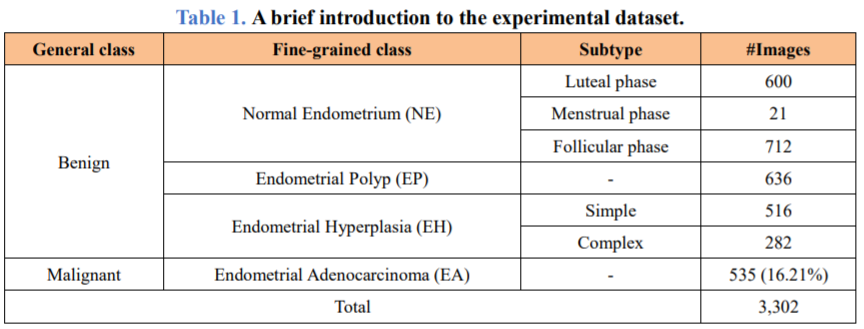

# China 데이터 준비
```
NE/ (normal endometrium)
  Luteal/
  Menstrual/
  Follicular/
EP/ (endometrial polyp)
EH/ (endometrial hyperplasia)
  Simple/
  Complex/
EA (endometrioid adenocarcinoma)

--> modeling for classifying NE/EP/EH/EA: train & test
```

In [ ]:
path_china = '/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/china/histopathological image dataset for ET'
%cd $path_china

/content/drive/My Drive/ImageAnalysis/digital_pathology/ImageDataset/EMCA/china/histopathological image dataset for ET


In [ ]:
import os
import glob

In [ ]:
doc = open("all_files.txt",'w')
for root, dirs, files in os.walk(path_china):
    for file in files:
        #print(file)
        if file.split('.')[-1]  in ['jpg', 'JPG']:
            print(os.path.join(root,file), file=doc)
doc.close()

In [ ]:
lastLine = ""
listflie = open("file_list.txt","w")
classnum = -1
# classnum 0(EP), 1(EH/Complex), 2(EH/Simple), 3(NE/Follicular), 4(NE/Luteal), 5(NE/Menstrual), 6(EA)
with open("all_files.txt") as f:
    line = f.readline()
    while line:
        thisline = line.split("/")[-3]+line.split("/")[-2]

        if lastLine==thisline:
            listflie.write(line.split("\n")[0]+"\t"+str(classnum)+"\n")
        else:
            classnum += 1
            lastLine = thisline
            listflie.write(line.split("\n")[0]+"\t"+str(classnum)+"\n")
        line = f.readline()

f.close()
listflie.close()

create_random list

In [ ]:
import numpy as np
import random

In [ ]:
# classnum 0(EP), 1(EH/Complex), 2(EH/Simple), 3(NE/Follicular), 4(NE/Luteal), 5(NE/Menstrual), 6(EA)
def creat_list(path):
    lists = [[] for i in range(4)]
    with open(path) as f:
        line = f.readline()
        while line:
            classnum = int(line.split("\t")[1])
            #NE
            if classnum == 3 or classnum == 4 or classnum == 5:
                lists[0].append(line.split("\t")[0])
            #EH
            if classnum == 1 or classnum == 2:
                lists[1].append(line.split("\t")[0])
            #EP
            if classnum == 0:
                lists[2].append(line.split("\t")[0])
            #EA
            if classnum == 6:
                lists[3].append(line.split("\t")[0])

            line = f.readline()
    f.close()
    return np.array(lists)

In [ ]:
list = creat_list("file_list.txt")
random_list = open("four_random_list.txt","w")
for c in range(len(list)):
    random.shuffle(list[c])
    for item in list[c]:
        random_list.write(str(item)+"\t"+str(c)+"\n")

### 경로명 활용한 list 변수

In [ ]:
os.listdir(path_china+'/NE')

['Follicular', 'Luteal', 'Menstrual']

In [ ]:
china_normal_luteal=[]
china_normal_menstrual=[]
china_normal_follicular=[]

for file_name in glob.glob(path_china+'/NE/Luteal/*.JPG'):
  china_normal_luteal.append(file_name)
for file_name in glob.glob(path_china+'/NE/Menstrual/*.JPG'):
  china_normal_menstrual.append(file_name)
for file_name in glob.glob(path_china+'/NE/Follicular/*.JPG'):
  china_normal_follicular.append(file_name)

len(china_normal_luteal), len(china_normal_menstrual), len(china_normal_follicular)

(600, 21, 712)

In [ ]:
china_polyp=[]
for file_name in glob.glob(path_china+'/EP/*.JPG'):
  china_polyp.append(file_name)
len(china_polyp)

636

In [ ]:
os.listdir(path_china+'/EH')

['Complex', 'Simple']

In [ ]:
china_hpl_simple=[]
china_hpl_complex=[]

for file_name in glob.glob(path_china+'/EH/Simple/*.JPG'):
  china_hpl_simple.append(file_name)
for file_name in glob.glob(path_china+'/EH/Complex/*.JPG'):
  china_hpl_complex.append(file_name)
len(china_hpl_simple), len(china_hpl_complex)

(516, 282)

In [ ]:
china_carcinoma=[]
for file_name in glob.glob(path_china+'/EA/*.JPG'):
  china_carcinoma.append(file_name)
len(china_carcinoma)

535

## image

In [ ]:
from skimage import io, transform
from sklearn import preprocessing
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

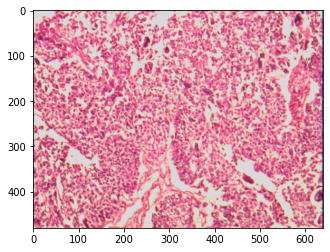

In [ ]:
img = io.imread(china_carcinoma[0])
plt.imshow(img)
# img.shape #(480, 640, 3)

# img_pil = Image.open(china_carcinoma[0])
# img_pil.size #(640, 480)
# img_pil_array = np.array(img_pil)
# plt.imshow(img_pil_array)
# plt.show()

# img_pil_resize = img_pil.resize((300, 300))
# plt.imshow(img_pil_resize)

# img_pil_crop = img_pil.crop((20,20,300,300))
# plt.imshow(img_pil_crop)
# img_pil_crop

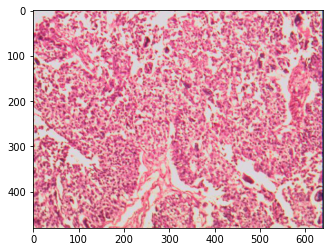

In [ ]:
def read_image(imagePath, height=600, width=600, normalization = True):
    img = io.imread(imagePath)
    if normalization == True:
        imageData = transform.resize(img,(height, width, 3))
        imageData = np.transpose(imageData,(2,0,1))
        imageData[0] = preprocessing.scale(imageData[0])
        imageData[1] = preprocessing.scale(imageData[1])
        imageData[2] = preprocessing.scale(imageData[2])
        imageData = np.transpose(imageData,(1,2,0))
        # imageData = transform.resize(img,(height, width, 3))
    else:
        imageData = transform.resize(img,(height, width, 3))
    return imageData

# plt.imshow(read_image(china_carcinoma[0], 480, 640 , False))

## keras_image

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
H, W = 224, 224 # Input shape, defined by the model (model.input_shape)

def load_image(path, preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    return x

# type(load_image(china_carcinoma[0], True))

numpy.ndarray

## tools

In [ ]:
from skimage import io, transform
import glob,math
import os
import tensorflow as tf
import numpy as np
import time
from sklearn import preprocessing
import random
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD,Adam
import numpy as np
from keras import backend as K

import gc
from PIL import Image,ImageEnhance

Using TensorFlow backend.


In [ ]:
def read_image(imagePath, width=600, height=600, normalization = True):
    img = io.imread(imagePath.split('\n')[0])
    if normalization == True:
        imageData = transform.resize(img,(width, height, 3))
        imageData = np.transpose(imageData,(2,0,1))
        imageData[0] = preprocessing.scale(imageData[0])
        imageData[1] = preprocessing.scale(imageData[1])
        imageData[2] = preprocessing.scale(imageData[2])
        imageData = np.transpose(imageData,(1,2,0))
        # imageData = transform.resize(img,(width, height,3))
    else:
        imageData = transform.resize(img,(width, height,3))
    return imageData

In [ ]:
def dataAugmentation(input_array, flip_left_right_rate=0.5, flip_top_bottom_rate=0.5):
    # array of rotated Image
    if (random.random() < flip_left_right_rate):
        # left & right
        input_array = np.transpose(input_array,(2,0,1))# w,h,3- > 3,w,h
        input_array[0] = np.flip(input_array[0], 1)
        input_array[1] = np.flip(input_array[1], 1)
        input_array[2] = np.flip(input_array[2], 1)
        input_array = np.transpose(input_array, (1,2,0))#3, w, h -> w, h, 3
    if (random.random() < flip_top_bottom_rate):
        # up & down
        input_array = np.transpose(input_array, (2, 0, 1))  # w,h,3- > 3,w,h
        input_array[0] = np.flip(input_array[0], 0)
        input_array[1] = np.flip(input_array[1], 0)
        input_array[2] = np.flip(input_array[2], 0)
        input_array = np.transpose(input_array, (1, 2, 0))  # 3, w, h -> w, h, 3

    return np.array(input_array)

In [ ]:
def read_bottleneck(bottleneckPath):
    bottleneck = []
    bottleneckFile  =  open(bottleneckPath.split('\n')[0])
    content = bottleneckFile.read()
    feature = content.split(',')
    for i in feature[0:-1]:
        bottleneck.append(float(i))
    bottleneck = preprocessing.scale(bottleneck)
    bottleneck = np.asarray(bottleneck)
    return bottleneck

In [ ]:
#adding data with label
def add_array(arr1,arr2):
    for a in arr2:
        arr1.append(a)
    return arr1

In [ ]:
# reading filename & label; according to key
def create_data_label(dic,key,label_id):
    data_path = []
    label = []
    for i in key:
        for v in dic[i]:
            label.append(label_id)
            data_path.append(v)
    return data_path, label

In [ ]:
# according to path key -> output: train & test
def slice_train_test(array, i, K):
    length = len(array)
    step = math.floor(length / K)
    if step == 0:
        step = 1
    print('length: %d, step: %d' %(length, step))
    train = []
    test = []
    if i==(K-1):
        for x in array[0: (min((step * i), (length - 1)))]:
            train.append(x)
        for x in array[(min((step * i), (length - 1))):]:
            test.append(x)
    else:
        for x in array[0: (min((step * i),(length - 1)))]:
            train.append(x)

        for x in array[(min((step * i),(length - 1))):(min((step * (i + 1),(length - 1))))]:
            test.append(x)

        for x in array[(min((step * (i + 1),(length - 1)))): ]:
            train.append(x)
    return train, test

In [ ]:
def batch_generator(all_data, all_label, batch_size, shuffle, class_num = 6,train = True):
    assert len(all_data) == len(all_label)
    print(len(all_data))
    if shuffle:
        indices = np.arange(len(all_data))
        random.shuffle(indices)
    while True:
        for start_idx in range(0, len(all_data) - batch_size + 1, batch_size):
            data = []
            labels = []
            if shuffle:
                excerpt = indices[start_idx:start_idx + batch_size]
            else:
                excerpt = slice(start_idx, start_idx + batch_size)

            for di in excerpt:
                tmp_data = all_data[di]
                if train:
                    tmp_data = dataAugmentation(tmp_data)
                data.append(tmp_data)

            for li in excerpt:
                cla = all_label[li]
                tmp = [0 for x in range(class_num)]
                tmp[cla] = 1
                labels.append(tmp)

            yield np.array(data),np.array(labels)


In [ ]:
def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper


In [ ]:
def batch_generator_confusion_matrix(all_data, all_label, batch_size, shuffle, class_num = 6):
    assert len(all_data) == len(all_label)
    print(len(all_data))

    if shuffle:
        indices = np.arange(len(all_data))
        random.shuffle(indices)

    for start_idx in range(0, len(all_data) - batch_size + 1, batch_size):
        data = []
        labels = []
        if shuffle:
            excerpt = indices[start_idx:start_idx + batch_size]
        else:
            excerpt = slice(start_idx, start_idx + batch_size)

        for di in excerpt:
            tmp_data = all_data[di]

            data.append(all_data[di])

        for li in excerpt:
            cla = all_label[li]
            tmp = [0 for x in range(class_num)]
            tmp[cla] = 1
            labels.append(tmp)

        yield np.array(data), np.array(labels)

In [ ]:
def create_directory(dir_path):
  if not os.path.exists(dir_path):
    os.makedirs(dir_path)

In [ ]:
def arr_max_index(arr):
    return np.where(arr == max(arr))[0][0]

## non_local

In [ ]:
from keras.layers import Activation, Reshape, Lambda, dot, add,concatenate
from keras.layers import Conv1D, Conv2D, Conv3D
from keras.layers import MaxPool1D
from keras import backend as K


In [ ]:
def non_local_block(ip, intermediate_dim=None, compression=2,
                    mode='embedded', add_residual=True):
    """
    Adds a Non-Local block for self attention to the input tensor.
    Input tensor can be or rank 3 (temporal), 4 (spatial) or 5 (spatio-temporal).

    Arguments:
        ip: input tensor
        intermediate_dim: The dimension of the intermediate representation. Can be
            `None` or a positive integer greater than 0. If `None`, computes the
            intermediate dimension as half of the input channel dimension.
        compression: None or positive integer. Compresses the intermediate
            representation during the dot products to reduce memory consumption.
            Default is set to 2, which states halve the time/space/spatio-time
            dimension for the intermediate step. Set to 1 to prevent computation
            compression. None or 1 causes no reduction.
        mode: Mode of operation. Can be one of `embedded`, `gaussian`, `dot` or
            `concatenate`.
        add_residual: Boolean value to decide if the residual connection should be
            added or not. Default is True for ResNets, and False for Self Attention.

    Returns:
        a tensor of same shape as input
    """
    channel_dim = 1 if K.image_data_format() == 'channels_first' else -1
    ip_shape = K.int_shape(ip)

    if mode not in ['gaussian', 'embedded', 'dot', 'concatenate']:
        raise ValueError('`mode` must be one of `gaussian`, `embedded`, `dot` or `concatenate`')

    if compression is None:
        compression = 1

    dim1, dim2, dim3 = None, None, None

    # check rank and calculate the input shape
    if len(ip_shape) == 3:  # temporal / time series data
        rank = 3
        batchsize, dim1, channels = ip_shape

    elif len(ip_shape) == 4:  # spatial / image data
        rank = 4

        if channel_dim == 1:
            batchsize, channels, dim1, dim2 = ip_shape
        else:
            batchsize, dim1, dim2, channels = ip_shape

    elif len(ip_shape) == 5:  # spatio-temporal / Video or Voxel data
        rank = 5

        if channel_dim == 1:
            batchsize, channels, dim1, dim2, dim3 = ip_shape
        else:
            batchsize, dim1, dim2, dim3, channels = ip_shape

    else:
        raise ValueError('Input dimension has to be either 3 (temporal), 4 (spatial) or 5 (spatio-temporal)')

    # verify correct intermediate dimension specified
    if intermediate_dim is None:
        intermediate_dim = channels // 2

        if intermediate_dim < 1:
            intermediate_dim = 1

    else:
        intermediate_dim = int(intermediate_dim)

        if intermediate_dim < 1:
            raise ValueError('`intermediate_dim` must be either `None` or positive integer greater than 1.')

    if mode == 'gaussian':  # Gaussian instantiation
        x1 = Reshape((-1, channels))(ip)  # xi
        x2 = Reshape((-1, channels))(ip)  # xj
        f = dot([x1, x2], axes=2)
        f = Activation('softmax')(f)

    elif mode == 'dot':  # Dot instantiation
        # theta path
        theta = _convND(ip, rank, intermediate_dim)
        theta = Reshape((-1, intermediate_dim))(theta)

        # phi path
        phi = _convND(ip, rank, intermediate_dim)
        phi = Reshape((-1, intermediate_dim))(phi)

        f = dot([theta, phi], axes=2)

        size = K.int_shape(f)

        # scale the values to make it size invariant
        f = Lambda(lambda z: (1. / float(size[-1])) * z)(f)

    elif mode == 'concatenate':  # Concatenation instantiation
        raise NotImplementedError('Concatenate model has not been implemented yet')

    else:  # Embedded Gaussian instantiation
        # theta path
        theta = _convND(ip, rank, intermediate_dim)
        theta = Reshape((-1, intermediate_dim))(theta)

        # phi path
        phi = _convND(ip, rank, intermediate_dim)
        phi = Reshape((-1, intermediate_dim))(phi)

        if compression > 1:
            # shielded computation
            phi = MaxPool1D(compression)(phi)

        f = dot([theta, phi], axes=2)
        f = Activation('softmax')(f)

    # g path
    g = _convND(ip, rank, intermediate_dim)
    g = Reshape((-1, intermediate_dim))(g)

    if compression > 1 and mode == 'embedded':
        # shielded computation
        g = MaxPool1D(compression)(g)

    # compute output path
    y = dot([f, g], axes=[2, 1])

    # reshape to input tensor format
    if rank == 3:
        y = Reshape((dim1, intermediate_dim))(y)
    elif rank == 4:
        if channel_dim == -1:
            y = Reshape((dim1, dim2, intermediate_dim))(y)
        else:
            y = Reshape((intermediate_dim, dim1, dim2))(y)
    else:
        if channel_dim == -1:
            y = Reshape((dim1, dim2, dim3, intermediate_dim))(y)
        else:
            y = Reshape((intermediate_dim, dim1, dim2, dim3))(y)

    # project filters
    y = _convND(y, rank, channels)

    # residual connection
    if add_residual:
        y = concatenate([ip, y],axis=3)

    return y

In [ ]:
def _convND(ip, rank, channels):
    assert rank in [3, 4, 5], "Rank of input must be 3, 4 or 5"

    if rank == 3:
        x = Conv1D(channels, 1, padding='same', use_bias=False, kernel_initializer='he_normal')(ip)
    elif rank == 4:
        x = Conv2D(channels, (1, 1), padding='same', use_bias=False, kernel_initializer='he_normal')(ip)
    else:
        x = Conv3D(channels, (1, 1, 1), padding='same', use_bias=False, kernel_initializer='he_normal')(ip)
    return x

## channel_attention

In [ ]:
from keras.layers import Activation, Reshape, Lambda, dot, add
from keras.layers import Conv1D, Conv2D, Conv3D
from keras.layers import MaxPool1D,GlobalAveragePooling2D,Dense,multiply,Activation,concatenate
from keras import backend as K


In [ ]:
def squeeze_excitation_layer(x, out_dim, ratio = 4, concate = True):
    '''
    SE module performs inter-channel weighting.
    '''
    squeeze = GlobalAveragePooling2D()(x)

    excitation = Dense(units=out_dim // ratio)(squeeze)
    excitation = Activation('relu')(excitation)
    excitation = Dense(units=out_dim)(excitation)
    excitation = Activation('sigmoid')(excitation)
    excitation = Reshape((1, 1, out_dim))(excitation)

    scale = multiply([x, excitation])

    if concate:
        scale = concatenate([scale, x],axis=3)
    return scale

### Modeling

In [ ]:
import sys
import cv2
from matplotlib import pyplot as plt
from keras import backend as K
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

from tensorflow.python.framework import ops
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,concatenate
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, BatchNormalization
from keras.layers import Input
from keras.models import Model
import tensorflow as tf
from keras import initializers
import non_local
import channel_attention

In [ ]:
def build_model():
    """Function returning keras model instance.
    
    Model can be
     - Trained here
     - Loaded with load_model
     - Loaded from keras.applications
    """
    input_tensor = Input(shape=(224, 224, 3))

    # backbone
    base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    base_output = base_model.output

    # self-attention
    x = non_local.non_local_block(base_output, intermediate_dim=None, compression=2,
                                  mode='embedded', add_residual=False)
    x = BatchNormalization()(x)

    # channel-attention
    y = channel_attention.squeeze_excitation_layer(base_output, 512, ratio=4, concate=False)
    y = BatchNormalization()(y)

    # concat
    x = concatenate([base_output, x], axis=3)
    x = concatenate([x, y], axis=3)
    # spp
    gap = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = concatenate([gap, x])
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    predict = Dense(4, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=predict)

    model.load_weights('model.h5')
    model.summary()
    return model

In [ ]:
H, W = 224, 224 # Input shape, defined by the model (model.input_shape)

def load_image(path, preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    return x

In [ ]:
def deprocess_image(x):
    """Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    """
    x = x.copy()
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_dim_ordering() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
def normalize(x):
    """Utility function to normalize a tensor by its L2 norm"""
    return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)


In [ ]:
def build_guided_model():
    """Function returning modified model.
    
    Changes gradient function for all ReLu activations
    according to Guided Backpropagation.
    """
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                   tf.cast(op.inputs[0] > 0., dtype)

    g = tf.get_default_graph()
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        new_model = build_model()

    return new_model


In [ ]:
def guided_backprop(input_model, images, layer_name):
    """Guided Backpropagation method for visualizing input saliency."""
    input_imgs = input_model.input
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(layer_output, input_imgs)[0]
    backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    grads_val = backprop_fn([images, 0])[0]
    return grads_val

In [ ]:
def grad_cam(input_model, image, cls, layer_name):
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    # Normalize if necessary
    # grads = normalize(grads)
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    # Process CAM
    cam = cv2.resize(cam, (H, W), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

In [ ]:
def grad_cam_batch(input_model, images, classes, layer_name):
    """GradCAM method for visualizing input saliency.
    Same as grad_cam but processes multiple images in one run."""
    loss = tf.gather_nd(input_model.output, np.dstack([range(images.shape[0]), classes])[0])
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(loss, layer_output)[0]
    gradient_fn = K.function([input_model.input, K.learning_phase()], [layer_output, grads])

    conv_output, grads_val = gradient_fn([images, 0])    
    weights = np.mean(grads_val, axis=(1, 2))
    cams = np.einsum('ijkl,il->ijk', conv_output, weights)
    
    # Process CAMs
    new_cams = np.empty((images.shape[0], H, W))
    for i in range(new_cams.shape[0]):
        cam_i = cams[i] - cams[i].mean()
        cam_i = (cam_i + 1e-10) / (np.linalg.norm(cam_i, 2) + 1e-10)
        new_cams[i] = cv2.resize(cam_i, (H, W), cv2.INTER_LINEAR)
        new_cams[i] = np.maximum(new_cams[i], 0)
        new_cams[i] = new_cams[i] / new_cams[i].max()
    
    return new_cams

In [ ]:
def compute_saliency(model, guided_model, img_path, layer_name='block5_conv3', cls=-1, visualize=True, save=True):
    """Compute saliency using all three approaches.
        -layer_name: layer to compute gradients;
        -cls: class number to localize (-1 for most probable class).
    """
    preprocessed_input = load_image(img_path)

    predictions = model.predict(preprocessed_input)
    # top_n = 3
    # top = decode_predictions(predictions, top=top_n)[0]
    # classes = np.argsort(predictions[0])[-top_n:][::-1]
    print('Model prediction:')
    # for c, p in zip(classes, top):
    #     print('\t{:15s}\t({})\twith probability {:.3f}'.format(p[1], c, p[2]))
    if cls == -1:
        cls = np.argmax(predictions)
    # class_name = decode_predictions(np.eye(1, 4, cls))[0][0][1]
    # print("Explanation for '{}'".format(class_name))
    
    gradcam = grad_cam(model, preprocessed_input, cls, layer_name)
    gb = guided_backprop(guided_model, preprocessed_input, layer_name)
    guided_gradcam = gb * gradcam[..., np.newaxis]

    if save:
        jetcam = cv2.applyColorMap(np.uint8(255 * gradcam), cv2.COLORMAP_JET)
        jetcam = (np.float32(jetcam) + load_image(img_path, preprocess=False)) / 2
        cv2.imwrite('gradcam.jpg', np.uint8(jetcam))
        cv2.imwrite('guided_backprop.jpg', deprocess_image(gb[0]))
        cv2.imwrite('guided_gradcam.jpg', deprocess_image(guided_gradcam[0]))
    
    if visualize:
        plt.figure(figsize=(15, 10))
        plt.subplot(131)
        plt.title('GradCAM')
        plt.axis('off')
        plt.imshow(load_image(img_path, preprocess=False))
        plt.imshow(gradcam, cmap='jet', alpha=0.5)

        plt.subplot(132)
        plt.title('Guided Backprop')
        plt.axis('off')
        plt.imshow(np.flip(deprocess_image(gb[0]), -1))
        
        plt.subplot(133)
        plt.title('Guided GradCAM')
        plt.axis('off')
        plt.imshow(np.flip(deprocess_image(guided_gradcam[0]), -1))
        plt.show()
        
    return gradcam, gb, guided_gradcam

In [ ]:
if __name__ == '__main__':
    model = build_model()
    guided_model = build_guided_model()
    gradcam, gb, guided_gradcam = compute_saliency(model, guided_model, layer_name='dense_8', img_path='E:\\zxx_final\\子宫内膜癌\\1607089（2）.JPG', cls=3, visualize=True, save=True)

### train_and_val_VGGCA

In [ ]:
from keras.optimizers import SGD,Adam
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,concatenate
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, BatchNormalization
from keras.layers import Input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard,CSVLogger
import tools
import gc
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
from keras.models import Model
import keras
import non_local
import channel_attention

In [ ]:
def creat_list(path):
    lists = [[] for i in range(4)]
    with open(path) as f:
        line = f.readline()
        while line:
            # print(line)
            classnum = int(line.split("\t")[1])
            lists[classnum].append(line.split("\t")[0])
            line = f.readline()
    f.close()
    return np.array(lists)


In [ ]:
def cross_validation(data, K, epoch, class_num, batch_size):
    category = len(data)
    print(category)
    print("=========================")
    # if shuffle:
    #     for c in range(category):
    #         random.shuffle(data[c])
    for i in range(0,K):
        print("%d-th fold" % i)
        train_data_path = []
        train_label = []
        test_data_path = []
        test_label = []
        for c in range(category):
            part_trian_data_path, part_test_data_path = tools.slice_train_test(data[c], i, K)

            for train_len in range(len(part_trian_data_path)):
                train_data_path.append(part_trian_data_path[train_len])
                train_label.append(c)

            for test_len in range(len(part_test_data_path)):
                test_data_path.append(part_test_data_path[test_len])
                test_label.append(c)

        print(len(train_data_path), len(train_label))
        print(len(test_data_path), len(test_label))

        record = open('records.txt', 'a+')
        record.write("%d-th fold\n" % i)
        record.write(str(train_data_path) + '\n')
        record.write(str(test_data_path) + '\n')
        record.close()

        train_data = []
        test_data = []

        for train_path in train_data_path:
            train_data.append(tools.read_image(train_path, 224, 224, True))
        for test_path in test_data_path:
            test_data.append(tools.read_image(test_path, 224, 224, True))

        Network_config(class_num = class_num, epoch = epoch, initial_epoch = 0, batch_size = batch_size,
                       train_data=train_data, train_label=train_label,
                       test_data=test_data, test_label=test_label, fold = i)
    return

In [ ]:
def Network_config(class_num=4, epoch=200, initial_epoch=0, batch_size=32,
                     train_data=None, train_label=None,
                     test_data=None, test_label=None, fold=0):
    adam = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0009)
    sgd = SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=False)

    input_tensor = Input(shape=(224, 224, 3))

    #backbone
    base_model = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    base_output = base_model.output

    # channel-attention
    x = channel_attention.squeeze_excitation_layer(base_output, 512, ratio=4, concate=False)
    x = BatchNormalization()(x)

    #concat
    x = concatenate([base_output, x], axis=3)

    # spp
    gap = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = concatenate([gap,x])
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    predict = Dense(class_num, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=predict)

    for layer in (base_model.layers):
        layer.trainable = False

    for l in model.layers:
        print(l.name)

    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=[keras.metrics.categorical_accuracy])
    model.summary()

    tools.create_directory('./final/')
    weights_file = './final/' + str(fold)+'-weights.{epoch:02d}-{categorical_accuracy:.4f}-{val_loss:.4f}-{val_categorical_accuracy:.4f}.h5'
    csv_file = './final/record.csv'
    lr_reducer = ReduceLROnPlateau(monitor='categorical_accuracy', factor=0.2,
                                   cooldown=0, patience=2, min_lr=0.5e-6)
    early_stopper = EarlyStopping(monitor='val_categorical_accuracy', min_delta=1e-4, patience=30)

    model_checkpoint = ModelCheckpoint(weights_file, monitor='val_categorical_accuracy', save_best_only=True,
                                       verbose=1,
                                       save_weights_only=True, mode='max')
    tensorboard = TensorBoard(log_dir='./logs/', histogram_freq=0, batch_size=8, write_graph=True,
                              write_grads=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None,
                              embeddings_metadata=None)
    CSV_record = CSVLogger(csv_file, separator=',', append=True)

    callbacks = [lr_reducer, early_stopper, model_checkpoint, tensorboard, CSV_record]
    gc.disable()
    model.fit_generator(
        generator=tools.batch_generator(np.array(train_data), np.array(train_label), batch_size, True, class_num, True),
        steps_per_epoch=int(len(train_label)/batch_size)-1,
        max_q_size=20,
        initial_epoch=initial_epoch,
        epochs=epoch,
        verbose=1,
        callbacks=callbacks,
        validation_data=tools.batch_generator(np.array(test_data), np.array(test_label), batch_size, True, class_num, False),
        validation_steps=int(len(test_label)/batch_size)-1,
        class_weight='auto')


    #confusion matrix
    all_y_pred = []
    all_y_true = []
    for test_data_batch, test_label_batch in tools.batch_generator_confusion_matrix(np.array(test_data),np.array(test_label), batch_size, True, class_num):
        y_pred = model.predict(test_data_batch, batch_size)
        y_true = test_label_batch
        for y_p in y_pred:
            all_y_pred.append(np.where(y_p == max(y_p))[0][0])
        for y_t in y_true:
            all_y_true.append(np.where(y_t == max(y_t))[0][0])
    confusion = confusion_matrix(y_true=all_y_true,y_pred=all_y_pred)
    print(confusion)
    f = open('confusion_matrix.txt','a+')
    f.write(str(all_y_true)+"\n")
    f.write(str(all_y_pred)+"\n")
    f.write(str(confusion)+'\n')
    f.close()
    gc.enable()
  

In [ ]:
def main():
    Network_config()
    data = creat_list('four_random_list.txt')
    cross_validation(data, K=10, epoch=200, class_num=4, batch_size=32)
main()